In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#unzip a zipped tuple of the latitudes and longitudes into the coordinates list
#unzip_lat_lngs = list(zip(*lat_lngs))
#print("Unzipped list is:"+str(unzip_lat_lngs))

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

In [8]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | qaqortoq
Processing Record 3 of Set 1 | necochea
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | fort nelson
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | medea
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | bintulu
Processing Record 17 of Set 1 | preobrazheniye
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | borba
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | saint george
Processing Record 23 of Set 1 | ponta do sol
P

Processing Record 35 of Set 4 | padang
Processing Record 36 of Set 4 | port elizabeth
Processing Record 37 of Set 4 | bathsheba
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | nantucket
Processing Record 40 of Set 4 | urusha
Processing Record 41 of Set 4 | asau
Processing Record 42 of Set 4 | pontes e lacerda
Processing Record 43 of Set 4 | mar del plata
Processing Record 44 of Set 4 | kupang
Processing Record 45 of Set 4 | tigre
Processing Record 46 of Set 4 | dudinka
Processing Record 47 of Set 4 | goderich
Processing Record 48 of Set 4 | bara
Processing Record 49 of Set 4 | lebu
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | sept-iles
Processing Record 2 of Set 5 | tura
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | portobelo
Processing Record 6 of Set 5 | huarmey
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | anchorage
Processing Record 

Processing Record 25 of Set 8 | sfantu gheorghe
Processing Record 26 of Set 8 | ambilobe
Processing Record 27 of Set 8 | caramay
Processing Record 28 of Set 8 | te anau
Processing Record 29 of Set 8 | emerald
Processing Record 30 of Set 8 | porto tolle
Processing Record 31 of Set 8 | honningsvag
Processing Record 32 of Set 8 | thinadhoo
Processing Record 33 of Set 8 | maniitsoq
Processing Record 34 of Set 8 | astoria
Processing Record 35 of Set 8 | manggar
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | san ignacio
Processing Record 38 of Set 8 | la paz
Processing Record 39 of Set 8 | puerto escondido
Processing Record 40 of Set 8 | alta floresta
Processing Record 41 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 42 of Set 8 | tondano
Processing Record 43 of Set 8 | gigmoto
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | elat
Processing Record 47 of Set 8 | lao cai
Processing Re

Processing Record 13 of Set 12 | mehamn
Processing Record 14 of Set 12 | porto franco
Processing Record 15 of Set 12 | taburi
City not found. Skipping...
Processing Record 16 of Set 12 | hashtrud
Processing Record 17 of Set 12 | liepaja
Processing Record 18 of Set 12 | morococha
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | caxias
Processing Record 21 of Set 12 | manaure
Processing Record 22 of Set 12 | banda aceh
Processing Record 23 of Set 12 | havre-saint-pierre
Processing Record 24 of Set 12 | colares
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | yanam
Processing Record 27 of Set 12 | borogontsy
Processing Record 28 of Set 12 | halstenbek
Processing Record 29 of Set 12 | okha
Processing Record 30 of Set 12 | makasar
Processing Record 31 of Set 12 | dashitou
Processing Record 32 of Set 12 | kannangad
Processing Record 33 of Set 12 | sukumo
Processing Record 34 of Set 12 | canton
Processing Record 35 of Set 12 | harer
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,83.89,74,20,5.99,MY,2022-01-18 16:32:43
1,Qaqortoq,60.7167,-46.0333,21.70,71,100,9.95,GL,2022-01-18 16:32:43
2,Necochea,-38.5473,-58.7368,65.03,57,100,18.05,AR,2022-01-18 16:29:22
3,Vila Velha,-20.3297,-40.2925,87.75,73,40,11.99,BR,2022-01-18 16:32:43
4,Daru,-9.0763,143.2092,77.29,89,100,5.30,PG,2022-01-18 16:32:43
5,Busselton,-33.6500,115.3333,83.05,51,7,9.17,AU,2022-01-18 16:32:44
6,Vaini,-21.2000,-175.2000,78.96,94,20,4.61,TO,2022-01-18 16:32:44
7,Fort Nelson,58.8053,-122.7002,-23.64,99,97,2.35,CA,2022-01-18 16:30:03
8,Saskylakh,71.9167,114.0833,-9.24,96,65,9.10,RU,2022-01-18 16:32:44
9,Kodiak,57.7900,-152.4072,31.51,86,100,0.00,US,2022-01-18 16:32:45


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed",]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-01-18 16:32:43,5.4112,100.3354,83.89,74,20,5.99
1,Qaqortoq,GL,2022-01-18 16:32:43,60.7167,-46.0333,21.70,71,100,9.95
2,Necochea,AR,2022-01-18 16:29:22,-38.5473,-58.7368,65.03,57,100,18.05
3,Vila Velha,BR,2022-01-18 16:32:43,-20.3297,-40.2925,87.75,73,40,11.99
4,Daru,PG,2022-01-18 16:32:43,-9.0763,143.2092,77.29,89,100,5.30
...,...,...,...,...,...,...,...,...,...
564,Mirnyy,RU,2022-01-18 16:47:17,62.5353,113.9611,-9.60,88,100,4.85
565,Palmer,US,2022-01-18 16:47:17,42.1584,-72.3287,32.04,50,20,5.01
566,Fuerte Olimpo,PY,2022-01-18 16:47:17,-21.0415,-57.8738,106.50,17,32,10.56
567,Nome,US,2022-01-18 16:47:17,64.5011,-165.4064,-18.33,69,0,0.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

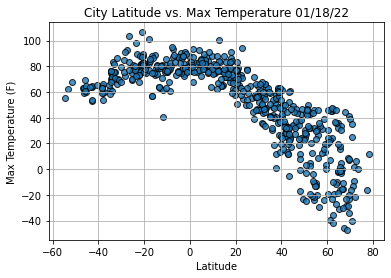

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

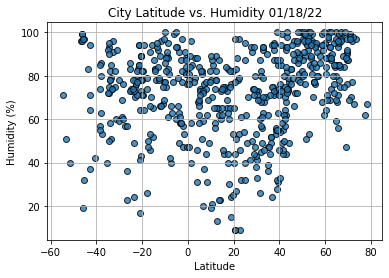

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

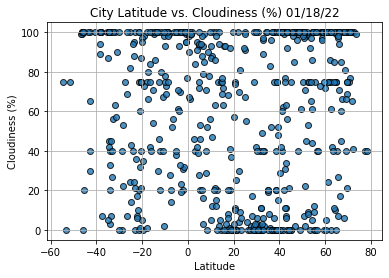

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

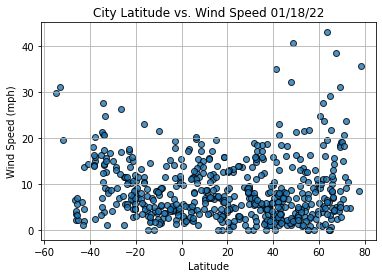

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#Create a Linear Regression Function

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# index13 = city_data_df.loc[13]
# index13

In [20]:
#city_data_df["Lat"] >= 0

In [21]:
#city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

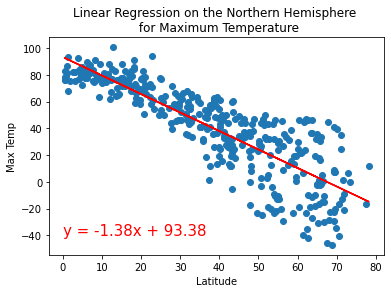

In [23]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,-40))

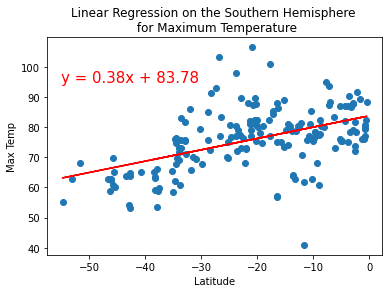

In [24]:
#Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

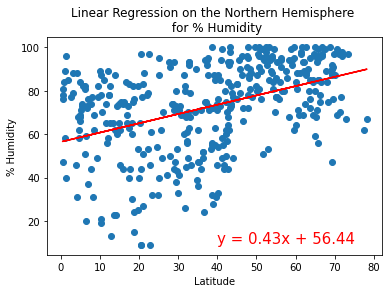

In [29]:
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

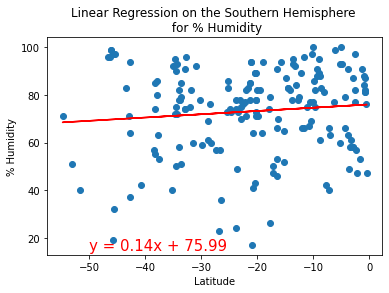

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

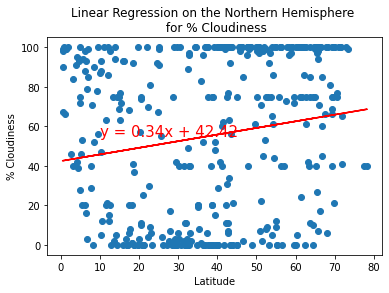

In [32]:
#Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

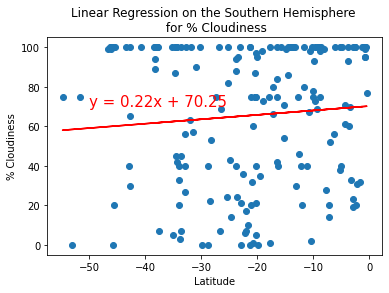

In [37]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,70))

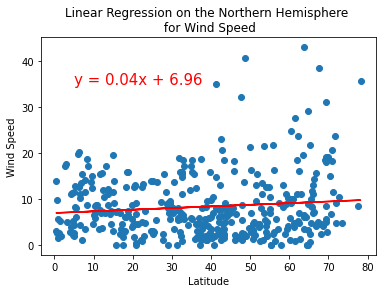

In [41]:
#Find the Correlation Between Latitude and Wind Speed
#Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,35))

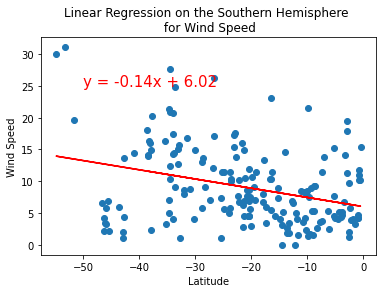

In [43]:
#Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))